In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('ggplot')
sns.set_context("paper")
%matplotlib inline

In [2]:
df=pd.read_csv('../../data/processed/merged_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65462 entries, 0 to 65461
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SalePrice            65462 non-null  int64  
 1   Township             65462 non-null  int64  
 2   SqFtLot              65462 non-null  int64  
 3   MtRainier            65462 non-null  int64  
 4   Olympics             65462 non-null  int64  
 5   Cascades             65462 non-null  int64  
 6   Territorial          65462 non-null  int64  
 7   SeattleSkyline       65462 non-null  int64  
 8   PugetSound           65462 non-null  int64  
 9   LakeWashington       65462 non-null  int64  
 10  LakeSammamish        65462 non-null  int64  
 11  SmallLakeRiverCreek  65462 non-null  int64  
 12  OtherView            65462 non-null  int64  
 13  WfntFootage          65462 non-null  int64  
 14  BldgGrade            65462 non-null  int64  
 15  SqFtUnfinFull        65462 non-null 

In [3]:
df.head()

,SalePrice,Township,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,BldgGrade,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,ViewUtilization,Bedrooms,YrBuilt,YrRenovated,PcntComplete,Condition,AddnlCost,SaleWarning,View_N,View_Y,TotBathrooms,TotFireplace
0,800000,26,10560,0,2,0,2,0,2,0,0,0,0,0,9,0,0,4200,2410,1850,8,560,0,220,0,390,7,3,N,3,1968,0,0,4,0,15 51,1,0,3.25,2
1,730000,26,9853,0,0,0,0,0,0,0,0,0,0,0,7,0,0,2410,1200,1200,6,0,500,110,0,0,5,2,NaN,5,1969,0,0,3,0,,0,0,3.00,2
2,875000,25,3600,0,0,0,0,0,0,0,0,0,0,0,8,0,0,1890,750,0,0,220,0,190,0,0,5,1,NaN,4,1919,0,0,3,0,,0,0,1.00,1
3,249950,26,7750,0,0,0,0,0,0,0,0,0,0,0,8,0,0,3340,2180,960,8,750,0,250,0,0,5,2,NaN,5,2019,0,58,3,5000,10,0,0,3.25,2
4,205000,26,7750,0,0,0,0,0,0,0,0,0,0,0,8,0,0,3340,2180,960,8,750,0,250,0,0,5,2,NaN,5,2019,0,58,3,5000,15,0,0,3.25,2


In [4]:
# Checking for correlation.

In [5]:
corr = np.abs(df.corr())

In [6]:
corr = corr.sort_values('SalePrice', ascending=False)

In [7]:
# Including mask for readibility.

In [8]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

In [9]:
# Creating correlogram to display correlation data.

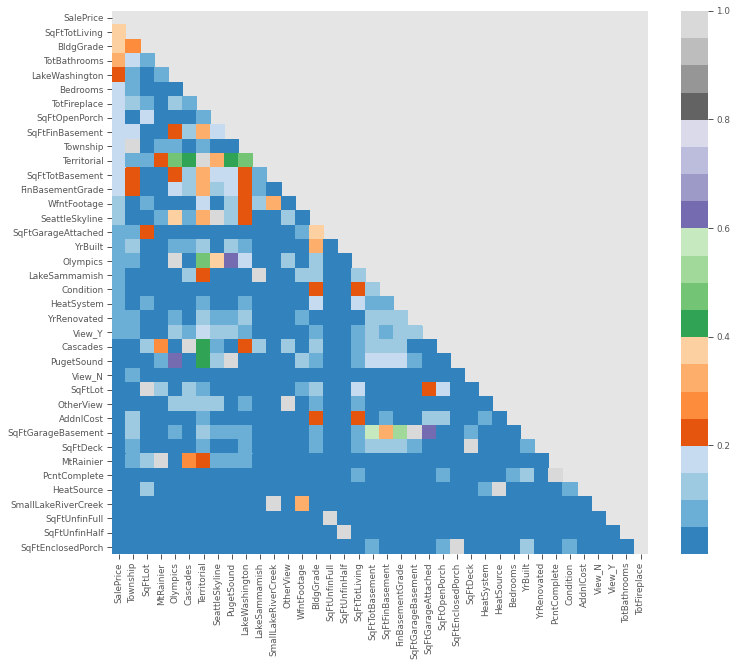

In [10]:
fig1, ax1 = plt.subplots(figsize=(12,10))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="tab20c");

### Model 1 - Correlated Variables

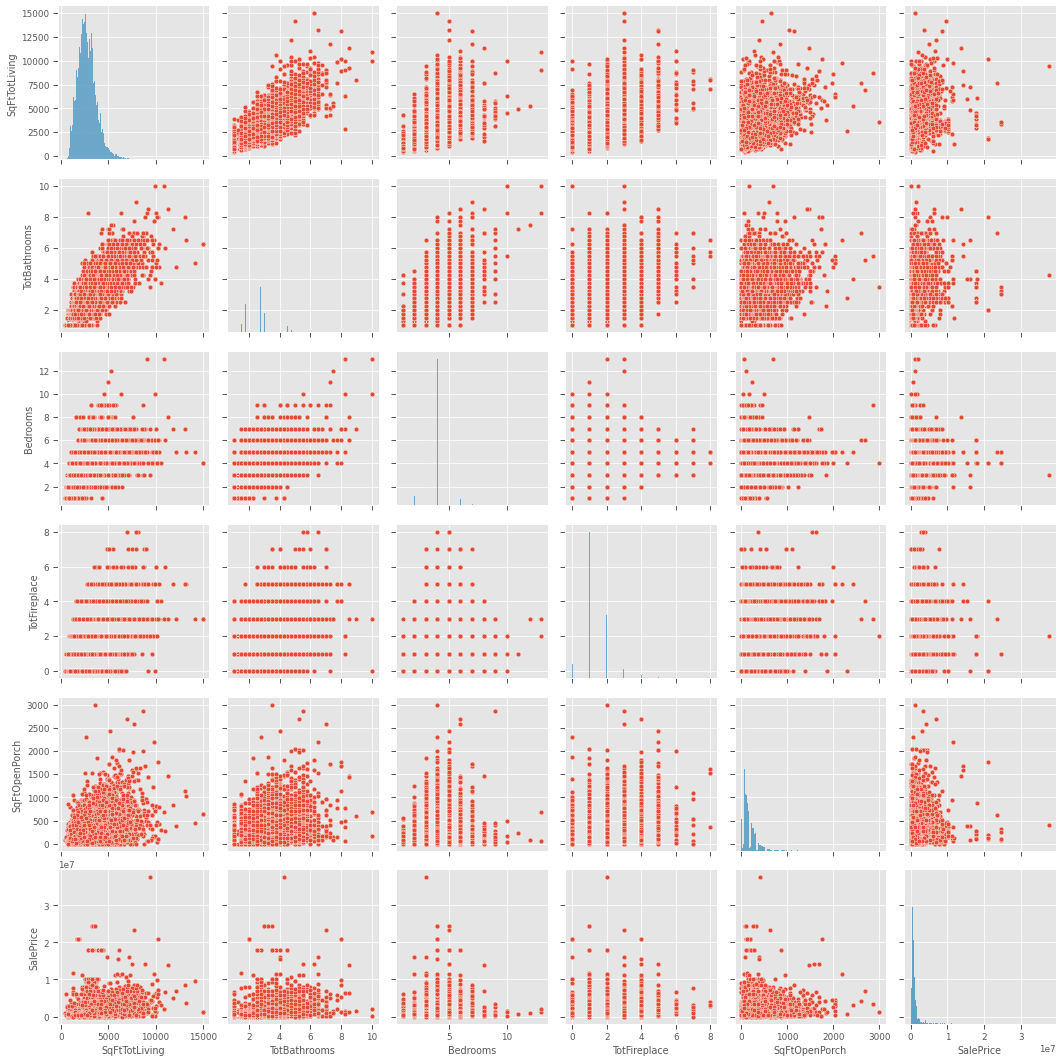

In [11]:
cor_cols = ['SqFtTotLiving', 'TotBathrooms','Bedrooms', 'TotFireplace', 'SqFtOpenPorch', 'SalePrice']
cor_cols_df = df[cor_cols]
sns.pairplot(cor_cols_df)
plt.show();

The Pairplot visualizes the correlation between the selected variables. While none of variables appear to have a strong linear relationship, SqFtTotLiving had the highest correlation and will be used for further analysis.

In [12]:
fsm_df = df[["SalePrice", "SqFtTotLiving"]].copy()
fsm_df.dropna(inplace=True)

In [13]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data = fsm_df)
fsm_results = fsm.fit()

In [14]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                 1.179e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:06:26   Log-Likelihood:            -9.9720e+05
No. Observations:               65462   AIC:                         1.994e+06
Df Residuals:                   65460   BIC:                         1.994e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.204e+05   1.11e+04    -19.882      0.000   -2.42e+05   -1.99e+05
SqFtTotLiving   406.9240      3.747    108.589      0.000     399.579     414.269
==============================================================================
Omnibus:                   107560.709   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         96869540.290
Skew:                          11.004   Prob(JB):                         0.00
Kurtosis:                     190.164   Cond. No.                     8.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 1 Evaluation

R2 and Adj R2 are both 0.152 so only about 15% of the variability in SalePrice (dependent variable) can be  explained by SqFtTotLiving (independent variable) using this model.

The Prob(F-statistic) which estimates the likelihood that this model results the way it does by chance is 0.

##### Linearity

In [15]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow statistic: 1.0250140684437068
Rainbow p-value: 0.01271459829110237


I used the linear_rainbox(model_results) from Stats models. Its null-hypothesis is that the model shows linearity. The alternate hypothesis is that it does not. The p-value is low meaning that we have sufficient evidence to reject the null-hypothesis. The model violates the assumption of linearity.

##### Normality

For this I used the Jarque-Bera test and Jarque-Bera (JB) p-value. The null hypothesis is that the residuals are normally distributed.  The alternative is that they are not. The p-value is 0 meaning that normality is violated. 

##### Homoscedasticity

Homoscedasticity can be visualized using the predicted SalePrice vs the residuals.

In [16]:
y = fsm_df['SalePrice']
y_hat = fsm_results.predict()

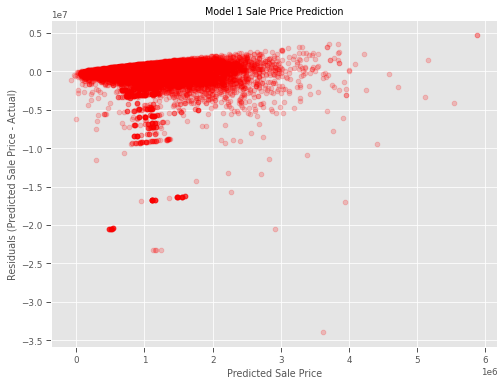

In [17]:
fig2, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("Model 1 Sale Price Prediction")
ax1.set(xlabel="Predicted Sale Price", ylabel="Residuals (Predicted Sale Price - Actual)")
ax1.scatter(x=y_hat, y=y_hat-y, color='red', alpha=0.2);

In [18]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df[['SalePrice']])

print("Lagrange Multiplier p-value:", lm_p_value)
print("F-Statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-Statistic p-value: 0.0


The null hypothesis is that the data is homoscedastic. Based on the graphical representation and het_breuschpagan test, we have sufficient evidence to reject the null hypothesis. There appears to be an underestimation for SalePrice. Further investigation is needed for this dependent variable. 

### Model 2 - Correlated Variables

In [19]:
## Further investigating data for outliers and reasonability.

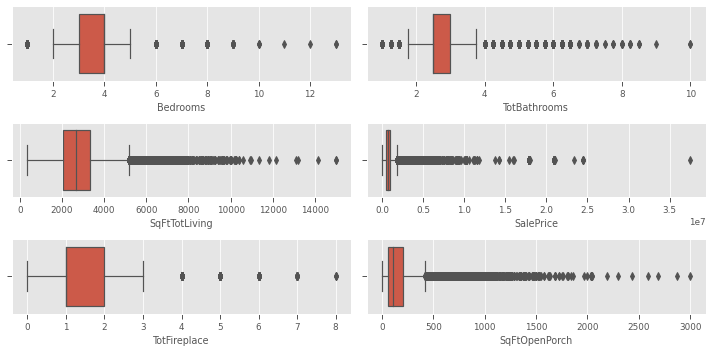

In [20]:
fig3, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(10,5))

sns.boxplot(x=df.Bedrooms, ax=ax1);
sns.boxplot(x=df.TotBathrooms, ax=ax2);
sns.boxplot(x=df.SqFtTotLiving, ax=ax3);
sns.boxplot(x=df.SalePrice, ax=ax4);
sns.boxplot(x=df.TotFireplace, ax=ax5);
sns.boxplot(x=df.SqFtOpenPorch, ax=ax6);

plt.tight_layout()

Model 1 calculated that a skew of as 10.995, a number that should be closer to zero for normally distributed data. The boxplots show that the data is heavily skewed to the right and is heavily impacted by outliers. Outliers will be removed. A log transformation will be used to normalize the data for use in model 2.

In [21]:
non_normal = ['SalePrice','SqFtTotLiving', 'TotBathrooms','Bedrooms','SqFtOpenPorch', 'TotFireplace']

Q1 = df[non_normal].quantile(0.25)
Q3 = df[non_normal].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[non_normal] < (Q1 - 1.5 * IQR)) |
          (df[non_normal] > (Q3 + 1.5 * IQR))).any(axis=1)]
len(df) #51160

51160

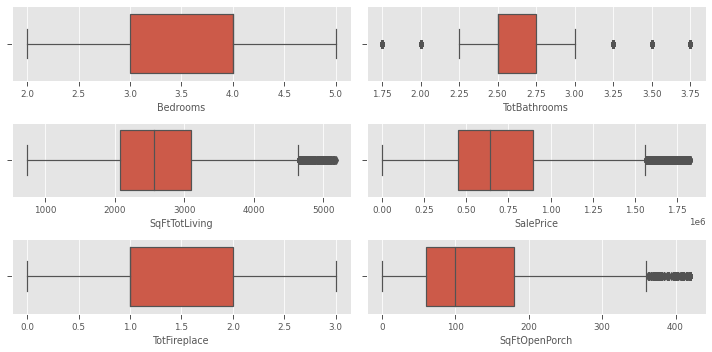

In [22]:
fig4, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(10,5))

sns.boxplot(x=df.Bedrooms, ax=ax1);
sns.boxplot(x=df.TotBathrooms, ax=ax2);
sns.boxplot(x=df.SqFtTotLiving, ax=ax3);
sns.boxplot(x=df.SalePrice, ax=ax4);
sns.boxplot(x=df.TotFireplace, ax=ax5);
sns.boxplot(x=df.SqFtOpenPorch, ax=ax6);

plt.tight_layout()

In [23]:
import numpy as np
non_normal2 = ['SalePrice','SqFtTotLiving', 'TotBathrooms','Bedrooms','SqFtOpenPorch', 'TotFireplace']

for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.sqrt(x))

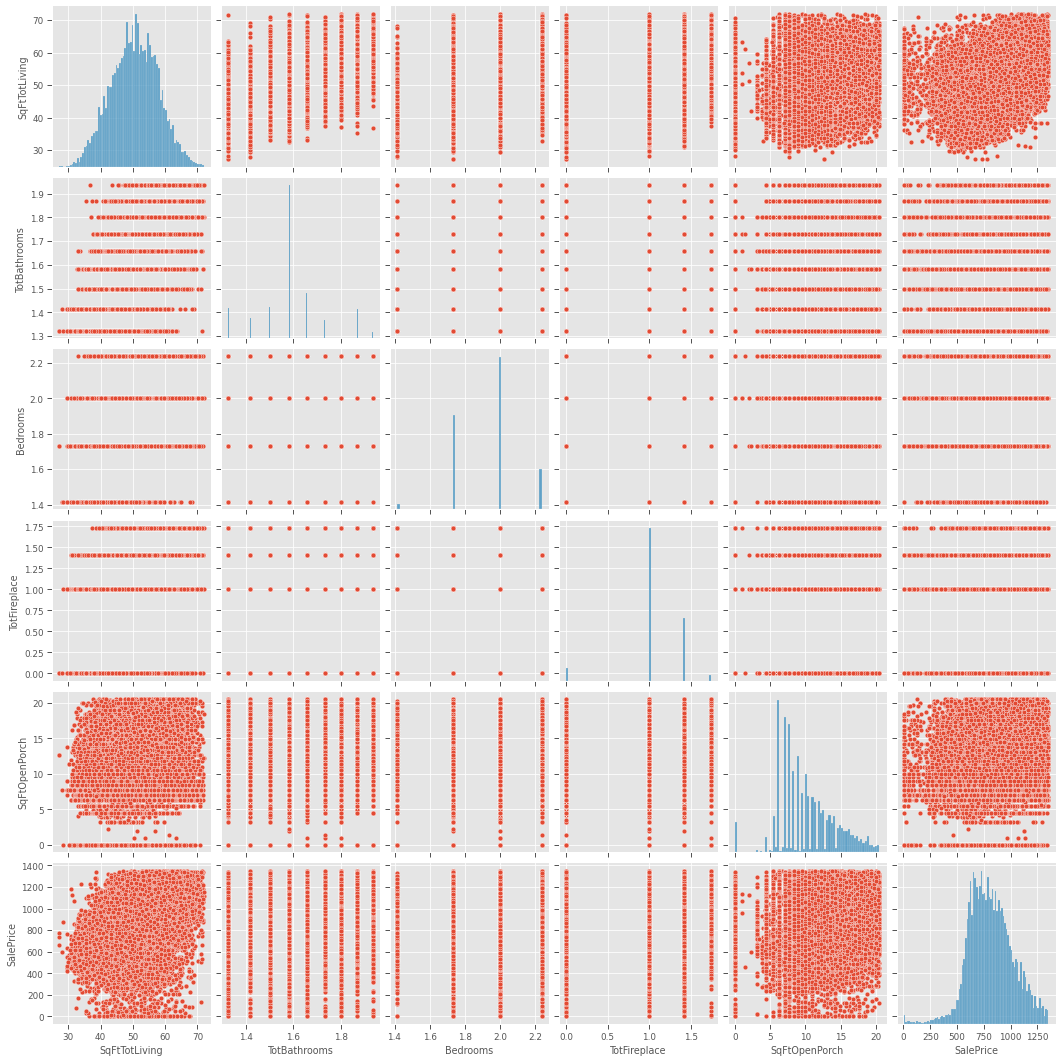

In [24]:
cor_cols2 = ['SqFtTotLiving', 'TotBathrooms','Bedrooms', 'TotFireplace', 'SqFtOpenPorch','SalePrice']
cor_cols_df2 = df[cor_cols2]
sns.pairplot(cor_cols_df2)
plt.show()

The Pairplot visualizes the correlation between the selected variables. While none of variables appear to have a strong linear relationship, SqFtTotLiving has the highest correlation and will be used for further analysis.

In [25]:
ssm_df = df[["SalePrice", "SqFtTotLiving", "TotBathrooms"]].copy()
ssm_df.dropna(inplace=True)

In [26]:
ssm = ols(formula="SalePrice ~ SqFtTotLiving + TotBathrooms", data = ssm_df)
ssm_results = ssm.fit()

In [27]:
ssm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     8283.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:06:39   Log-Likelihood:            -3.3769e+05
No. Observations:               51160   AIC:                         6.754e+05
Df Residuals:                   51157   BIC:                         6.754e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       104.8875      8.693     12.066      0.000      87.850     121.925
SqFtTotLiving    14.1705      0.146     97.140      0.000      13.885      14.456
TotBathrooms     -4.4647      7.182     -0.622      0.534     -18.542       9.613
==============================================================================
Omnibus:                     3727.700   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10856.992
Skew:                          -0.389   Prob(JB):                         0.00
Kurtosis:                       5.118   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 2 Evaluation

R2 and Adj R2 are both 0.226 so only about 25% of the variability in SalePrice (dependent variable) can be explained by SqFtTotLiving and TotBathroom (independent variables) after the data was transformed. This is higher than model 1.

The Prob(F-statistic) which estimates the likelylood that this model resulting the way it does by chance is still 0.

##### Linearity

In [28]:
rainbow_statistic, rainbow_p_value = linear_rainbow(ssm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow statistic: 1.023619351910393
Rainbow p-value: 0.030967977702980203


I used the linear_rainbox(model_results) from Stats models. Its null-hypothesis is that the model shows linearity. The alternate hypothesis is that it does not. The p-value is low meaning that we have sufficient evidence to reject the null-hypothesis. The model violates the assumption of linearity. I must also note, that this result is higher than that of model 1.

##### Normality

For this I used the Jarque-Bera test and Jarque-Bera (JB) p-value. The null hypothesis is that the residuals are normally distributed. The p-value is still at 0 meaning that the normality assumption is still violated. 

##### Homoscedasticity

This can be visualized using the predicted SalePrice vs the residuals.

In [29]:
y2 = ssm_df['SalePrice']
y_hat2 = ssm_results.predict()

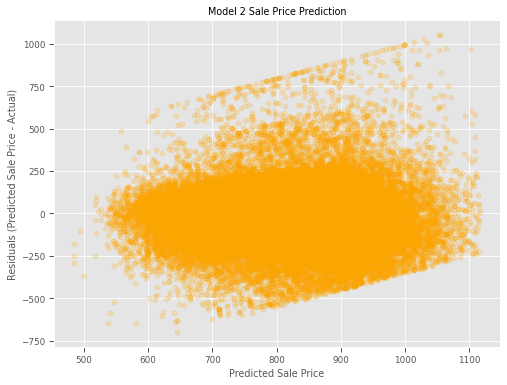

In [30]:
fig5, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("Model 2 Sale Price Prediction")
ax1.set(xlabel="Predicted Sale Price", ylabel="Residuals (Predicted Sale Price - Actual)")
ax1.scatter(x=y_hat2, y=y_hat2-y2, color='orange', alpha=0.2);

In [31]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y2-y_hat2, ssm_df[['SalePrice']])

print("Lagrange Multiplier p-value:", lm_p_value)
print("F-Statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-Statistic p-value: 0.0


The null hypothesis is that the data is homoscedastic. Based on the graphical representation and het_breuschpagan test, we have sufficient evidence to reject the null hypothesis. While outliers were removed, it appears to be both an underestimation and overestimation for SalePrice. Further investigation is needed for this dependent variable.

##### Independence

This can be tested using the variance inflation factor from Statsmodels.

In [32]:
rows = ssm_df[["SqFtTotLiving", "TotBathrooms"]].values

In [33]:
vif_df = pd.DataFrame()

In [34]:
vif_df['VIF'] = [variance_inflation_factor(rows, i) for i in range(2)]

In [35]:
vif_df['Feature'] = ["SqFtTotLiving", "TotBathrooms"]

In [36]:
vif_df

,VIF,Feature
0,89.491651,SqFtTotLiving
1,89.491651,TotBathrooms


A VIF score of 5 is too high. So it is reasonable to say that we are violating the independence assumption.

### Model 3 - Adding a Categorical Variables

In [37]:
tsm_df = df[["SalePrice", "SqFtTotLiving", "TotBathrooms", "Bedrooms", "View_Y" ]].copy()
tsm_df.dropna(inplace=True)

In [38]:
tsm_df.head()

,SalePrice,SqFtTotLiving,TotBathrooms,Bedrooms,View_Y
0,894.427191,64.807407,1.802776,1.732051,0
1,854.400375,49.091751,1.732051,2.236068,0
3,499.949997,57.792733,1.802776,2.236068,0
4,452.769257,57.792733,1.802776,2.236068,0
5,987.420883,48.270074,1.658312,2.236068,0


In [39]:
tsm = ols(formula="SalePrice ~ SqFtTotLiving + TotBathrooms + Bedrooms + View_Y", data = tsm_df)
tsm_results = tsm.fit()

In [40]:
tsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     4390.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:06:39   Log-Likelihood:            -3.3731e+05
No. Observations:               51160   AIC:                         6.746e+05
Df Residuals:                   51155   BIC:                         6.747e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       218.4789     10.108     21.615      0.000     198.668     238.290
SqFtTotLiving    15.1737      0.153     99.018      0.000      14.873      15.474
TotBathrooms     11.7288      7.269      1.614      0.107      -2.518      25.976
Bedrooms        -99.2213      5.104    -19.441      0.000    -109.225     -89.218
View_Y          127.0248      6.804     18.668      0.000     113.688     140.362
==============================================================================
Omnibus:                     4200.418   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12885.913
Skew:                          -0.428   Prob(JB):                         0.00
Kurtosis:                       5.305   Cond. No.                         744.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 3 Evaluation

R2 and Adj R2 are both .256 so about 26% of the variability in SalePrice (dependent variable) can be  explained by the independent variables in this model.

The Prob(F-statistic) which estimates the likelihood that this model results the way it does is 0.

##### Linearity

In [41]:
rainbow_statistic, rainbow_p_value = linear_rainbow(tsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow statistic: 1.0236302958115517
Rainbow p-value: 0.030910883045058405


I used the linear_rainbox(model_results) from Stats models. Its null-hypothesis is that the model shows linearity. The alternate hypothesis is that it does not. The p-value is low meaning that we have sufficient evidence to reject the null-hypothesis. The model violates the assumption of linearity. I must note that this result is higher than that of model 2.

##### Normality

For this I used the Jarque-Bera test and Jarque-Bera (JB) p-value. The null hypothesis is that the residuals are normally distributed.  The alternative is that they are not. The p-value is 0 meaning that normality is violated. 

##### Homoscedasticity

This can be visualized using the predicted SalePrice vs the residuals.

In [42]:
y3 = tsm_df['SalePrice']
y_hat3 = tsm_results.predict()

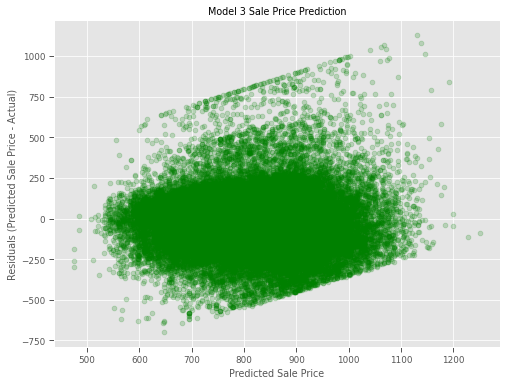

In [43]:
fig8, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("Model 3 Sale Price Prediction")
ax1.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Predicted Sale Price - Actual)")
ax1.scatter(x=y_hat3, y=y_hat3-y3, color='green', alpha=0.2);

In [44]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y3-y_hat3, tsm_df[['SalePrice']])

print("Lagrange Multiplier p-value:", lm_p_value)
print("F-Statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-Statistic p-value: 0.0


Based on the graphical representation and het_breuschpagan test, we have sufficient evidence to reject the null hypothesis. There appears to be both an underestimation and overestimation for SalePrice. 

## Summary

I started with a baseline model where the only input feature was `SqFtTotLiving`.  The baseline model had an r-squared of 0.152.  This model violated the linearity (p < 0.001), normality (p < 0.001), and homoscedasticity (p < 0.001) assumptions of linear regression.  The independence assumption was met by default because there was only one input feature.

The second model used `TotBathrooms` as the other input feature.  The baseline model had an r-squared of 0.226.  This model violated the linearity (p < 0.001), normality (p < 0.001), and homoscedasticity (p < 0.001) assumptions of linear regression.  The independence assumption was not met.

The final model added a categorical feature `ViewUtilization`.  It had an r-squared of 0.256.  This model violated the linearity (p < 0.001), normality (p < 0.001), and homoscedasticity (p < 0.001) assumptions of linear regression.  The independence assumption was not met.


The data analysis supports the following recommendations for home owners hoping to increase the sale price of their home.

#### 1. Have a least 2 , 4-5 bedrooms ####

The model used in this analysis showed the coefficient for bedrooms to be -99.2213. For each increase of bedrooms by 1 unit, it is predicted to have a -99.22 on the Sale Price. Using a bar graph to map this data it was revealed that homes with three bedrooms sold for less than homes with 2 or 4-5 bedrooms.

#### 2. Increase total bathrooms to 2.25-3.75 ####

The model used in this analysis showed the coefficient for the  bathrooms to be 11.7288. This means, for each increase by 1 unit of bathrooms, it is predicted to have a change on 11.79 on the Sale Price.

#### 3. Utilize surrounding view, if available. #### 
127.0248
The highest positive coefficient predicted by the model was the utilizing the available view. The coefficient for Utilizing view feature was 127.02. Because the data here was categorical and binary, one unit (or actually utilizing the view) was predicted to have a positive change of 127.02 on Sale Price.

#### 4. Consider projects that will expand the total living space. #### 
The model used in this analysis showed the coefficient for the  total living space to be 15.1737. This means, for each increase by 1 unit of total living, it is predicted to have a change on 15.17 on the Sale Price.

